서포트 벡터 머신(SVM) 


* SVM을 쉽게 생각하면, 데이터를 두 그룹으로 나누는 **'가장 완벽한 칼날'**을 찾는 알고리즘입니다.


    - 결정 경계(Decision Boundary): 이 '칼날'을 머신러닝 용어로는 '결정 경계'라고 부릅니다. 

                                    이 칼날을 기준으로 왼쪽은 '사과', 오른쪽은 '바나나'처럼 데이터를 분류하는 거죠.


    - 서포트 벡터(Support Vector): SVM은 이 칼날을 그냥 아무렇게나 놓지 않습니다. 

                                 각 그룹에서 칼날에 가장 가까이 있는 데이터들을 찾는데, 이 데이터들이 바로 '서포트 벡터'입니다.



마진(Margin) 최대화: SVM의 목표는 이 '서포트 벡터'들과 '결정 경계' 사이의 거리를 최대한 멀리 떨어뜨리는 것입니다. 

                    이 거리가 바로 **'마진'**입니다. 

                    마진이 넓을수록 분류가 더 확실해지고, 새로운 데이터가 들어왔을 때 잘못 분류될 가능성이 줄어듭니다. 

                    마치 아주 조심스럽게 물건을 자르는 요리사처럼, 양쪽 끝에 있는 데이터들 사이의 가장 안전한 위치에 칼날을 놓는 것과 같습니다.



로지스틱 회귀가 '이건 사과일 확률이 90%야'라고 확률로 답하는 반면, 

SVM은 '이건 그냥 이 칼날의 오른쪽에 있으니 바나나야'라고 

선명한 경계선을 기준으로 답하는 것이 가장 큰 차이점입니다.

==========

- 일대다(One-vs-Rest) 방법:


1. 예를 들어, '사과', '바나나', '포도' 세 클래스가 있다고 가정해 볼게요.

2. 이 방법은 한 클래스와 나머지 클래스들을 묶어서 두 가지로 분류하는 SVM 모델을 여러 개 만듭니다.

3. 사과 vs (바나나, 포도)

4. 바나나 vs (사과, 포도)

5. 포도 vs (사과, 바나나)

6. 이렇게 3개의 모델을 만든 뒤, 각 모델이 내놓은 결과 중 가장 높은 점수를 받은 클래스를 최종 예측값으로 선택합니다.

-------


- 일대일(One-vs-One) 방법:

1. 이 방법은 모든 클래스 쌍에 대해 두 가지로 분류하는 SVM 모델을 만듭니다.

2. 사과 vs 바나나

3. 사과 vs 포도

4. 바나나 vs 포도

5. 이렇게 3개의 모델을 만든 뒤, 각 모델의 투표를 통해 가장 많이 득표한 클래스를 최종 예측값으로 결정합니다.


모델의 정확도: 0.9778

오차 행렬:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]


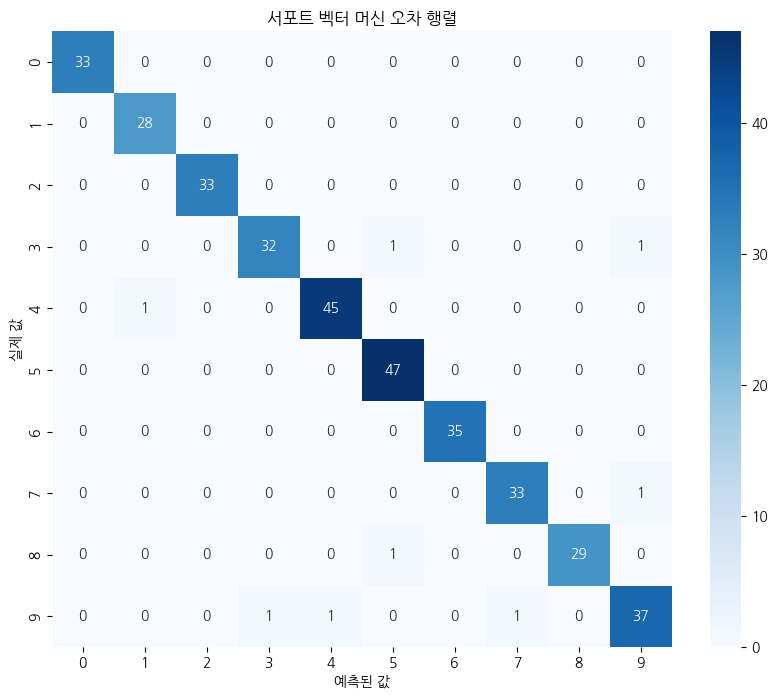

In [1]:
# 파일명: 20_서포트_벡터_머신_다중_분류.ipynb

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# -----------------------------------------------------------
# 1. 환경 설정 및 라이브러리 설치 안내
# -----------------------------------------------------------
# 이 코드를 실행하기 위해 필요한 패키지를 설치하는 방법입니다.
# 사용하시는 가상 환경 이름은 'mldl_env_250804'를 자동으로 사용합니다.
# 터미널에서 다음 명령어를 실행하여 필요한 라이브러리를 설치하세요.
# python3 -m pip install scikit-learn matplotlib numpy seaborn

# -----------------------------------------------------------
# 2. 한글 폰트 설정
# -----------------------------------------------------------
# matplotlib에서 한글을 정상적으로 표시하기 위해 폰트를 설정합니다.
# 'NanumGothic' 폰트가 설치되어 있지 않으면 경고가 발생할 수 있습니다.
# 폰트가 없는 경우, 'NanumGothic'을 설치하거나 다른 한글 폰트 이름을 사용하세요.
try:
    font_path = fm.findfont(fm.FontProperties(family='NanumGothic'))
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
except:
    print("경고: NanumGothic 폰트를 찾을 수 없습니다. 한글을 올바르게 표시하려면 한글 폰트를 설치하세요.")

# -----------------------------------------------------------
# 3. 데이터 준비
# -----------------------------------------------------------
# sklearn에서 제공하는 손글씨 숫자(digits) 데이터셋을 로드합니다.
digits = load_digits()

# 특성(X)과 타겟(y) 데이터를 분리합니다.
X = digits.data
y = digits.target

# -----------------------------------------------------------
# 4. 훈련 세트와 테스트 세트 분리
# -----------------------------------------------------------
# 데이터를 훈련 세트와 테스트 세트로 나눕니다. (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------------------
# 5. 서포트 벡터 머신(SVM) 모델 훈련
# -----------------------------------------------------------
# SVC(Support Vector Classifier) 모델을 생성합니다.
# kernel='linear'는 선형 결정 경계를 사용하도록 설정합니다.
# C=100.0은 규제(Regularization) 매개변수로, 모델의 복잡도를 조절합니다. 값이 클수록 모델이 더 복잡해집니다.
model = SVC(kernel='linear', C=100.0, random_state=42)

# 훈련 세트로 모델을 학습시킵니다.
model.fit(X_train, y_train)

# -----------------------------------------------------------
# 6. 모델 평가
# -----------------------------------------------------------
# 테스트 세트를 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 정확도(Accuracy)를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델의 정확도: {accuracy:.4f}")

# 오차 행렬(Confusion Matrix)을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n오차 행렬:")
print(conf_matrix)

# -----------------------------------------------------------
# 7. 오차 행렬 시각화
# -----------------------------------------------------------
# 오차 행렬을 히트맵(heatmap)으로 시각화하여 결과를 쉽게 파악할 수 있습니다.
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("예측된 값")
plt.ylabel("실제 값")
plt.title("서포트 벡터 머신 오차 행렬")
plt.show()
